In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# Read the data
df = pd.read_csv('Tweets.csv')

In [3]:
df.shape

(14640, 15)

In [4]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


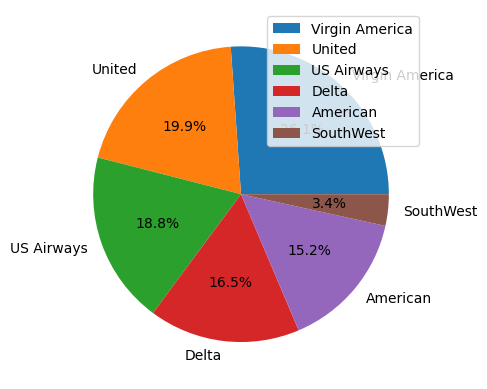

In [30]:
mylabels = ['Virgin America','United','US Airways', 'Delta','American','SouthWest']

plt.pie(df.airline.value_counts(), autopct="%1.1f%%",labels =mylabels)
plt.legend();

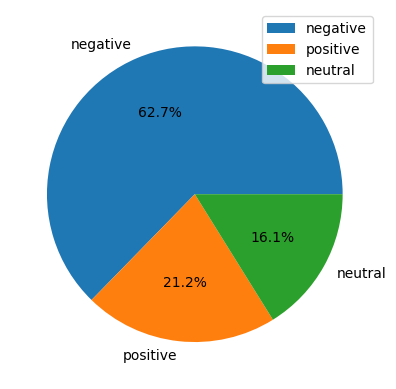

In [31]:
mylabels1 = ['negative','positive','neutral']
plt.pie(df.airline_sentiment.value_counts(), autopct="%1.1f%%",labels =mylabels1)
plt.legend();

<AxesSubplot: xlabel='airline'>

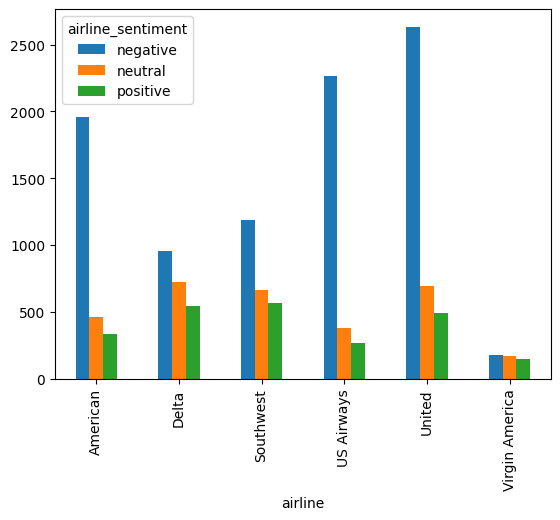

In [42]:
# Create a bar chart by airline and airline sentiment
df.groupby(['airline'])['airline_sentiment'].value_counts().unstack().plot(kind='bar')

<AxesSubplot: xlabel='airline_sentiment'>

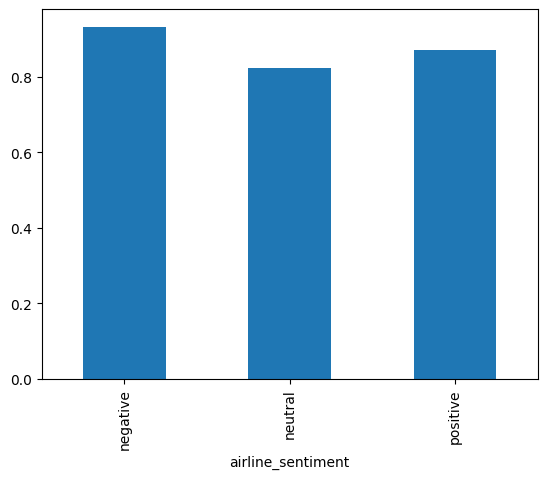

In [69]:
# Create a bar plot for airline sentiment and airline sentiment confidence
df.groupby(['airline_sentiment'])['airline_sentiment_confidence'].mean().plot(kind='bar')

In [71]:
# Create a new dataframe that will only have 2 relevant columns
# Identify the 2 columns
# For airline_sentiment I only want to see positive and negative sentiments
# Remove the neutral sentiments from the dataframe

df_1 = df[['airline','text', 'airline_sentiment']]
df_1=df_1[df_1.airline_sentiment != 'neutral'].reset_index(drop=True)

In [72]:
#Your final dataframe should look like this
df_1

,airline,text,airline_sentiment
0,Virgin America,@VirginAmerica plus you've added commercials t...,positive
1,Virgin America,@VirginAmerica it's really aggressive to blast...,negative
2,Virgin America,@VirginAmerica and it's a really big bad thing...,negative
3,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,negative
4,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",positive
...,...,...,...
11536,American,@AmericanAir my flight was Cancelled Flightled...,negative
11537,American,@AmericanAir right on cue with the delays👌,negative
11538,American,@AmericanAir thank you we got on a different f...,positive
11539,American,@AmericanAir leaving over 20 minutes Late Flig...,negative


In [73]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Use this to create the corpus. Use the same steps from the last lab

In [75]:
# Clean the text by removing any extra characters 
import re # tools for cleaning text
import nltk # library to perform NLP
from nltk.corpus import stopwords
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

In [113]:
corpus = [] # Build a new list for all the words from all the reviews
for i in range (0, 11541):
    review = re.sub('[^a-zA-Z]', ' ', df_1['text'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    review=review.replace('virginamerica','')
    review=review.replace('united','')
    review=review.replace('jetblue','')
    review=review.replace('southwestair','')
    review=review.replace('usairways','')
    corpus.append(review)

In [114]:
corpus

[' plu ad commerci experi tacki',
 ' realli aggress blast obnoxi entertain guest face amp littl recours',
 ' realli big bad thing',
 ' serious would pay flight seat play realli bad thing fli va',
 ' ye nearli everi time fli vx ear worm go away',
 ' well',
 ' amaz arriv hour earli good',
 ' lt pretti graphic much better minim iconographi',
 ' great deal alreadi think nd trip australia amp even gone st trip yet p',
 ' virginmedia fli fabul seduct sky u take stress away travel http co ahlxhhkiyn',
 ' thank',
 ' sfo pdx schedul still mia',
 ' excit first cross countri flight lax mco heard noth great thing virgin america daystogo',
 ' flew nyc sfo last week fulli sit seat due two larg gentleman either side help',
 'fli ',
 ' know would amazingli awesom bo fll pleas want fli',
 ' first fare may three time carrier seat avail select',
 ' love graphic http co ut grrwaaa',
 ' love hipster innov feel good brand',
 ' guy mess seat reserv seat friend guy gave seat away want free internet',
 ' statu

Create bag of words model

In [115]:
# Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1000)# We restrict the words to 1500 which keeps the most frequent words

In [116]:
X = cv.fit_transform(corpus).toarray()

In [117]:
print(cv.get_feature_names())

['aa', 'abl', 'absolut', 'absurd', 'accept', 'access', 'accommod', 'account', 'act', 'actual', 'ad', 'add', 'addit', 'address', 'admir', 'advis', 'afternoon', 'agent', 'ago', 'ahead', 'air', 'aircraft', 'airlin', 'airplan', 'airport', 'airway', 'alert', 'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway', 'amaz', 'american', 'americanair', 'americanairlin', 'amp', 'angri', 'announc', 'annoy', 'anoth', 'answer', 'anymor', 'anyon', 'anyth', 'anyway', 'anywher', 'apolog', 'app', 'appar', 'appear', 'appreci', 'area', 'around', 'arriv', 'asap', 'ask', 'assign', 'assist', 'atl', 'atlanta', 'attempt', 'attend', 'attitud', 'au', 'austin', 'auto', 'autom', 'avail', 'avoid', 'aw', 'award', 'away', 'awesom', 'babi', 'back', 'bad', 'badcustomerservic', 'badservic', 'bag', 'baggag', 'bank', 'basic', 'bc', 'beauti', 'begin', 'behind', 'believ', 'best', 'better', 'beyond', 'big', 'bin', 'bird', 'birthday', 'bit', 'blame', 'blue', 'bna', 'bo', 'board', 'book', 'boston', 'bother', 'bought',

In [118]:
X.shape


(11541, 1000)

In [127]:
from sklearn.preprocessing import LabelEncoder
Enco= LabelEncoder()
df_1["airline_sentiment"] = Enco.fit_transform(df_1['airline_sentiment'])

In [128]:
df_1

,airline,text,airline_sentiment
0,Virgin America,@VirginAmerica plus you've added commercials t...,1
1,Virgin America,@VirginAmerica it's really aggressive to blast...,0
2,Virgin America,@VirginAmerica and it's a really big bad thing...,0
3,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,0
4,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",1
...,...,...,...
11536,American,@AmericanAir my flight was Cancelled Flightled...,0
11537,American,@AmericanAir right on cue with the delays👌,0
11538,American,@AmericanAir thank you we got on a different f...,1
11539,American,@AmericanAir leaving over 20 minutes Late Flig...,0


In [129]:
y = df_1.iloc[:, 2].values

In [130]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [131]:
y

array([1, 0, 0, ..., 1, 0, 0])

Apply Various Machine Learning Classification Models (all 5)

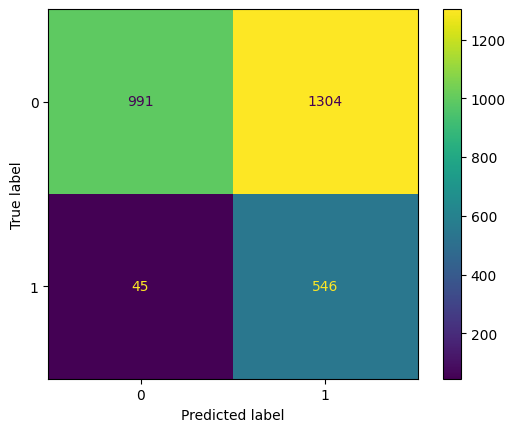

accuracy: 0.5325710325710326
precision: 0.2951351351351351
recallscore: 0.9238578680203046
f1score: 0.4473576403113478


In [138]:
# Naive Bayes Model
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.25, random_state=61)

# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)


# Predicting the Test set results 
y_pred_gnb  =  gnb.predict(X_test)

# Make the Confusion Matrix

# Predicting the Test set results 
cm = confusion_matrix(y_test, y_pred_gnb)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()
plt.show()
ac = accuracy_score(y_test,y_pred_gnb)
prec=precision_score(y_test,y_pred_gnb)
recall=recall_score(y_test,y_pred_gnb)
f1=f1_score(y_test,y_pred_gnb)

# Evaluate the results
print('accuracy:',ac)
print('precision:',prec)
print('recallscore:',recall)
print('f1score:',f1)

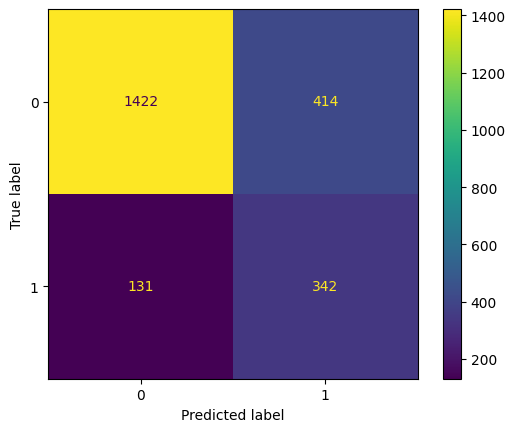

accuracy 0.7639670853183196
precision 0.4523809523809524
recallscore 0.7230443974630021
f1score 0.5565500406834826


In [141]:
#KNN Model

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN =  KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)

# Predicting the Test set results 
y_pred_knn  =  KNN.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNN.classes_)
disp.plot()
plt.show()
ac = accuracy_score(y_test,y_pred_knn)
prec=precision_score(y_test,y_pred_knn)
recall=recall_score(y_test,y_pred_knn)
f1=f1_score(y_test,y_pred_knn)

# Evaluate the results
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)


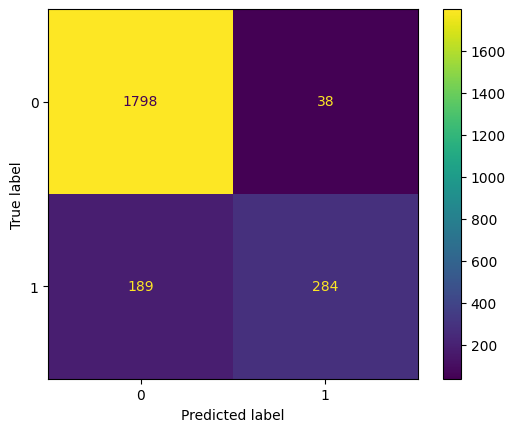

accuracy 0.9016890428757037
precision 0.8819875776397516
recallscore 0.6004228329809725
f1score 0.7144654088050314


In [144]:
#Support Vector Machine SVM Model

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
from sklearn import svm
svm = svm.SVC(decision_function_shape='ovo')
svm.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = svm.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()
plt.show()
ac = accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

# Evaluate the results
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

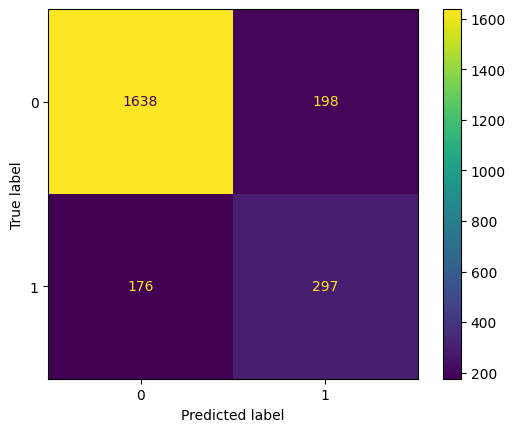

accuracy 0.8380251190991771
precision 0.6
recallscore 0.627906976744186
f1score 0.6136363636363636


In [145]:
#Decision Tree Classification Model

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=94)
clf.fit(X_train, y_train)

# Predicting the Test set results 
y_pred_clf = clf.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_clf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()
ac = accuracy_score(y_test,y_pred_clf)
prec=precision_score(y_test,y_pred_clf)
recall=recall_score(y_test,y_pred_clf)
f1=f1_score(y_test,y_pred_clf)



# Evaluate the results
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

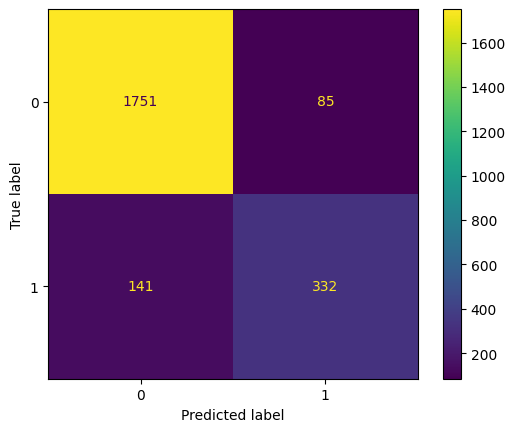

accuracy 0.9021221307925509
precision 0.7961630695443646
recallscore 0.7019027484143763
f1score 0.7460674157303371


In [146]:
#Random Forest Model

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(random_state=1)
rfm.fit(X_train, y_train)


# Predicting the Test set results 
y_pred_rfm = rfm.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfm)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfm.classes_)
disp.plot()
plt.show()
# Make the Confusion Matrix
#cm = confusion_matrix(y_test, y_pred_rfm)
ac = accuracy_score(y_test,y_pred_rfm)
prec=precision_score(y_test,y_pred_rfm)
recall=recall_score(y_test,y_pred_rfm)
f1=f1_score(y_test,y_pred_rfm)

# Evaluate the results
#print('Confusion Matrix',cm)
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

Feature Extraction

TF IDF

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [148]:
corpus = vectorizer.fit_transform(corpus).toarray()


In [149]:
 X =corpus

In [150]:
X.shape

(11541, 1583)

Apply the Machine learning models onto this TF-IDF model (all 5)

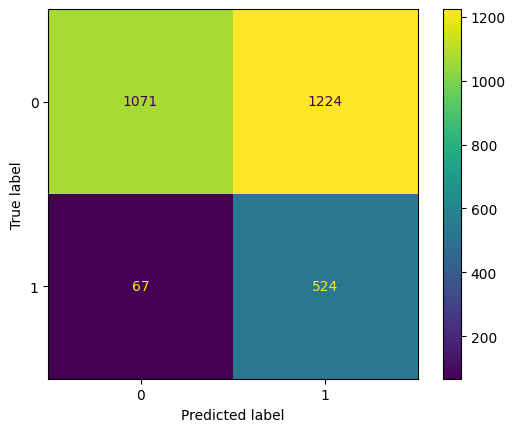

accuracy 0.5526680526680526
precision 0.2997711670480549
recallscore 0.8866328257191202
f1score 0.44805472424112874


In [152]:
# Naive Bayes Model
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.25, random_state=1)

# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)


# Predicting the Test set results 
y_pred_gnb  =  gnb.predict(X_test)
# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gnb)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()
plt.show()
# Make the Confusion Matrix
#cm = confusion_matrix(y_test, y_pred_gnb)
ac = accuracy_score(y_test,y_pred_gnb)
prec=precision_score(y_test,y_pred_gnb)
recall=recall_score(y_test,y_pred_gnb)
f1=f1_score(y_test,y_pred_gnb)

# Evaluate the results
#print('Confusion Matrix',cm)
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

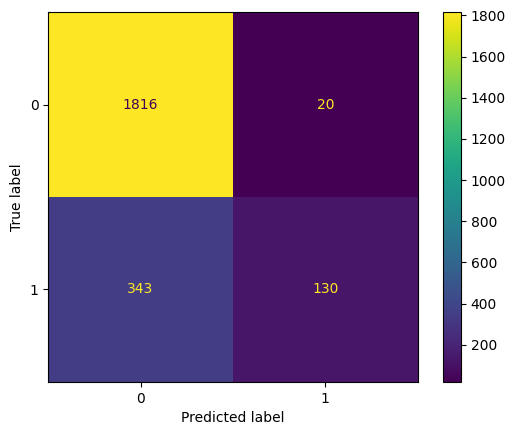

accuracy 0.8427890861844954
precision 0.8666666666666667
recallscore 0.2748414376321353
f1score 0.4173354735152488


In [153]:
#KNN Model

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN =  KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)

# Predicting the Test set results 
y_pred_knn  =  KNN.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNN.classes_)
disp.plot()
plt.show()
#cm = confusion_matrix(y_test, y_pred_knn)
ac = accuracy_score(y_test,y_pred_knn)
prec=precision_score(y_test,y_pred_knn)
recall=recall_score(y_test,y_pred_knn)
f1=f1_score(y_test,y_pred_knn)

# Evaluate the results
#print('Confusion Matrix',cm)
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

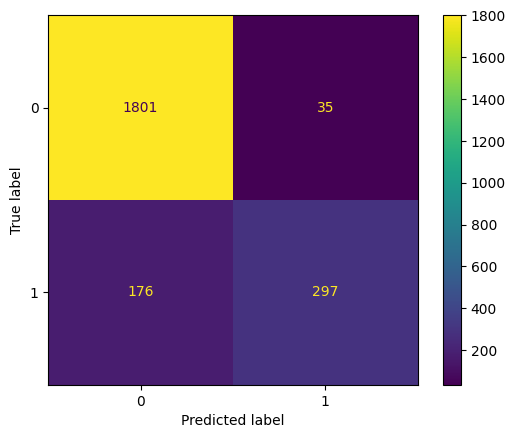

accuracy 0.9086184495452577
precision 0.8945783132530121
recallscore 0.627906976744186
f1score 0.7378881987577639


In [154]:
    #Support Vector Machine SVM Model

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
from sklearn import svm
svm = svm.SVC(decision_function_shape='ovo')
svm.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = svm.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()
plt.show()
#cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

# Evaluate the results
#print('Confusion Matrix',cm)
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

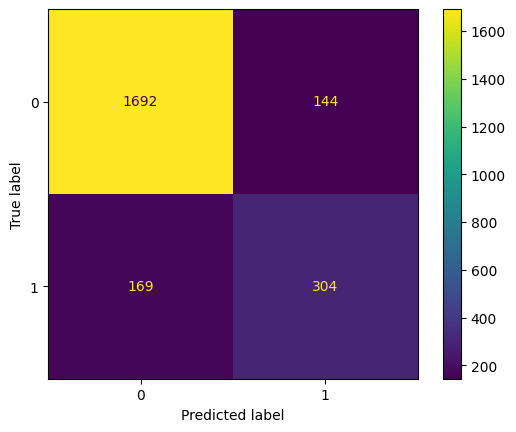

accuracy 0.8644434820268515
precision 0.6785714285714286
recallscore 0.642706131078224
f1score 0.6601520086862106


In [155]:
#Decision Tree Classification Model

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=94)
clf.fit(X_train, y_train)

# Predicting the Test set results 
y_pred_clf = clf.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_clf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()
#cm = confusion_matrix(y_test, y_pred_clf)
ac = accuracy_score(y_test,y_pred_clf)
prec=precision_score(y_test,y_pred_clf)
recall=recall_score(y_test,y_pred_clf)
f1=f1_score(y_test,y_pred_clf)

# Evaluate the results
#print('Confusion Matrix',cm)
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

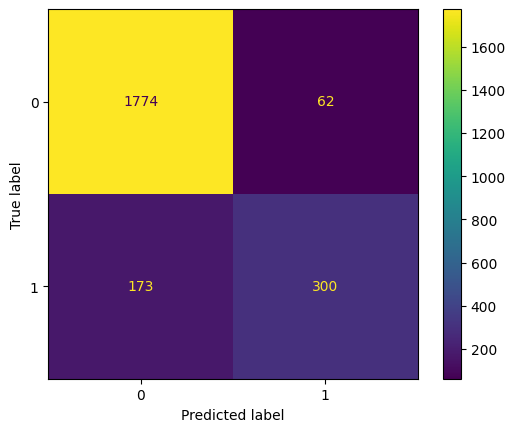

accuracy 0.8982243395409268
precision 0.8287292817679558
recallscore 0.6342494714587738
f1score 0.718562874251497


In [156]:
#Random Forest Model

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify = y, test_size = 0.2, random_state=1)

# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(random_state=1)
rfm.fit(X_train, y_train)


# Predicting the Test set results 
y_pred_rfm = rfm.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfm)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfm.classes_)
disp.plot()
plt.show()
#cm = confusion_matrix(y_test, y_pred_rfm)
ac = accuracy_score(y_test,y_pred_rfm)
prec=precision_score(y_test,y_pred_rfm)
recall=recall_score(y_test,y_pred_rfm)
f1=f1_score(y_test,y_pred_rfm)

# Evaluate the results
#print('Confusion Matrix',cm)
print('accuracy',ac)
print('precision',prec)
print('recallscore',recall)
print('f1score',f1)

Compare the various models on both the approaches.

| Name of the model| Bagofwords | TF IDF |
| :-  | :-  | :- |
|Naive Bayes Model| 0.5325 | 0.5526 |
|KNN Model|0.7639 | 0.8427 |
|Support Vector Machine SVM Model| 0.9016 | 0.9086 |
|Decision Tree Model| 0.8380 | 0.864 |
|Random Forest Model| 0.9021 | 0.898 |

In [160]:
import pandas as pd

data = {
  "Models": [ 'Navie Bayes',"KNN", 'SVM','Descion tree','Random Forest'],
  "Accuracy Score (CV)": [0.5325, 0.7639, 0.9016,0.8380,0.9021],


}

#load data into a DataFrame object:
Scores = pd.DataFrame(data)

print(Scores) 

data1 = {
  "Models": [ 'Navie Bayes',"KNN", 'SVM','Descion tree','Random Forest'],
  "Accuracy Score (TFIDF)": [0.5526,  0.8427, 0.9086,0.864,0.898],


}

#load data into a DataFrame object:
Scores1 = pd.DataFrame(data1)

print(Scores1) 

          Models  Accuracy Score (CV)
0    Navie Bayes               0.5325
1            KNN               0.7639
2            SVM               0.9016
3   Descion tree               0.8380
4  Random Forest               0.9021
          Models  Accuracy Score (TFIDF)
0    Navie Bayes                  0.5526
1            KNN                  0.8427
2            SVM                  0.9086
3   Descion tree                  0.8640
4  Random Forest                  0.8980


Which model predicts the best?

Here, the best model is Support Vector Machine with TFIDF Feature Extraction method as TFIDF find most important word related sentiment and Accuracy achieved best as compared to other ones algorithms and Bag of Words. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf774db2-d69d-4c68-9d3d-54c7625b552d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>